In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã–≤–æ–¥
–í—ã–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é df –ø—Ä–æ—à–ª–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –í—Å–µ–≥–æ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ 11 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ –ø–æ—á—Ç–∏ 17 —Ç—ã—Å—è—á —Å—Ç—Ä–æ–∫. –£–∂–µ –∏–∑ –º–µ—Ç–æ–¥–∞ info –≤–∏–¥–Ω–æ —á—Ç–æ, –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –≤–æ–∑–º–æ–∂–Ω–æ –Ω–µ –≤–µ–∑–¥–µ –ø—Ä–∞–≤–∏–ª—å–Ω–æ —É–∫–∞–∑–∞–Ω —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –∏ —Ç.–¥. –ó–∞–π–º–µ–º—Å—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–æ–π –Ω–∞ –≤—Ç–æ—Ä–æ–º —à–∞–≥–µ.

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö


In [4]:
df.columns = map(str.lower, df.columns)
df = df.dropna(subset = ['year_of_release','name','genre'])
df['rating'] = df['rating'].replace(np.NaN, 'X')
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].replace(np.NaN, -1)
df['critic_score'] = df['critic_score'].replace(np.NaN, -1)
df = df.astype({ "year_of_release": "int64", "user_score": "float64"})

–ù–∞ –¥–∞–Ω–Ω–æ–º —à–∞–≥–µ –º—ã –ø—Ä–∏–≤–µ–ª–∏ –≤—Å–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É. –ü–æ–º–µ–Ω—è–ª–∏ —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ "year_of_release" - –≥–æ–¥ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —É–∫–∞–∑–∞–Ω –∫–∞–∫ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–µ, –ø–æ—ç—Ç–æ–º—É –≤—ã–±—Ä–∞–ª–∏ int –≤–º–µ—Å—Ç–æ float. –í —Å—Ç–æ–ª–±—Ü–µ "user_score"- –æ—Ü–µ–Ω–∫–∞ —Å—Ç–∞–≤–∏—Ç—Å—è –ø–æ 10-—Ç–∏ –±–∞–ª–ª—å–Ω–æ–π —à–∫–∞–ª–µ, –∏—Å—Ö–æ–¥—è –∏–∑ —ç—Ç–æ–≥–æ –ø—Ä–æ–∏–∑–≤–µ–ª–∏ –∑–∞–º–µ–Ω—É –Ω–∞ float –≤–º–µ—Å—Ç–æ object, –Ω–æ —Å–ø–µ—Ä–≤–∞ –∑–∞–º–µ–Ω–∏–ª–∏ –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—É "tbd"(To Be Determined (–±—É–¥–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ) –Ω–∞ Nan.–ó–∞–ø–æ–ª–Ω–∏–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ —ç—Ç–æ—Ç —à–∞–≥ —É –º–µ–Ω—è –±—ã–ª –ø–æ—Å–ª–µ –≤—ã–≤–æ–¥–∞ –Ω–∏–∂–µ, –Ω–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –Ω–µ –ø—Ä–æ–ø—É—Å–∫–∞–ª–∞ –∫–æ–¥ –≤ —Ç–∞–∫–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª–Ω–æ—Å—Ç–∏.–ü—Ä–∏—à–ª–æ—Å—å –ø–µ—Ä–µ–Ω—Å—Ç–∏ –≤ –ø–µ—Ä–≤—ã–π —à–∞–≥.

In [5]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

–ö–∞–∫ –≤–∏–¥–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —É –Ω–∞—Å –≤ 6 —Å—Ç–æ–ª–±—Ü–∞—Ö:
* –í —Å—Ç–æ–ª–±—Ü–∞—Ö name,year_of_realease,genre –∏—Ö –≤—Å–µ–≥–æ 273- –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª–∏—Ç—å —ç—Ç–∏ —Å—Ç—Ä–æ–∫–∏, —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã—Ö –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ–≥–æ df  –º—ã –ø–æ—Ç–µ—Ä—è–µ–º –º–µ–Ω—å—à–µ –¥–≤—É—Ö –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤(16700/300 ~ 1.7%), –∞ –∑–∞–º–µ–Ω–∞ –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∏–ª–∏ –º–µ–¥–∏–∞–Ω—É –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º.–û—Ç—Å—É—Ç—Å–≤–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∂–∞–Ω—Ä—É –∏ –Ω–∞–∑–≤–∞–Ω–∏—é –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–æ–π, –∫–∞—Å–∞–µ–º–æ –≥–æ–¥–∞ —Ä–µ–ª–∏–∑–∞, –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–∞ –º–æ–º–µ–Ω—Ç —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –æ–Ω –Ω–µ –±—ã–ª –æ–ø—Ä–µ–¥–µ–ª–µ–Ω.

* –û—Ü–µ–Ω–∫–∏ –∫—Ä–∏—Ç–∏–∫–æ–≤ –∑–∞–ø–æ–ª–Ω–∏–º –º–µ–¥–∏–∞–Ω–æ–π(—Ç.–∫ –æ—Ü–µ–Ω–∫–∞ –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 0 –¥–æ 100). –ó–Ω–∞—á–µ–Ω–∏–π —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ, —á—Ç–æ–±—ã –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª—è—Ç—å –∏—Ö. –û—Ü–µ–Ω–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–¥—É—Ç –æ—Ç 0 –¥–æ 10. –í—ã–±—Ä–æ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –æ–±—â—É—é –∫–∞—Ä—Ç–∏–Ω—É –∑–¥–µ—Å—å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å,–ø–æ—ç—Ç–æ–º—É –∑–∞–ø–æ–ª–Ω–∏–º —Å—Ä–µ–¥–Ω–∏–º.
 –î—É–º–∞—é –ø—Ä–æ–ø—É—Å–∫–∏ –∑–¥–µ—Å—å –æ–±—É—Å–ª–æ–≤–µ–Ω—ã —Ç–µ–º —á—Ç–æ –∏–≥—Ä–∞ –º–∞–ª–æ –∏–∑–≤–µ—Å—Ç–Ω–∞ —à–∏—Ä–æ–∫–æ–π –ø—É–±–ª–∏–∫–µ –∏–ª–∏ —Ä–µ–ª–∏–∑ –ø—Ä–æ—à–µ–ª –Ω–µ —Ç–∞–∫ –¥–∞–≤–Ω–æ –∏ –∏–≥—Ä—É –µ—â–µ –Ω–µ —É—Å–ø–µ–ª–∏ –æ—Ü–µ–Ω–∏—Ç—å.
* –ß—Ç–æ –∫–∞—Å–∞–µ—Ç—Å—è —Å—Ç–æ–ª–±—Ü–∞ Rating, —Ç–æ —É–¥–∞–ª–µ–Ω–∏–µ –∑–¥–µ—Å—å —Ç–∞–∫–∂–µ –Ω–µ –ø–æ–¥–æ–π–¥–µ—Ç(—Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö –ø–æ—Ç–µ—Ä—è–µ–º), –∑–∞–º–µ–Ω–∞ –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ( –º–µ–¥–∏–∞–Ω—É) –Ω–µ–≤–æ–∑–º–æ–∂–Ω–∞. –ü—Ä–µ–¥–ª–∞–≥–∞—é –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ —Å–∏–º–≤–æ–ª 'X', –æ–Ω –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —Ä–µ–π—Ç–∏–Ω–≥ –Ω–µ –±—ã–ª —É–∫–∞–∑–∞–Ω –¥–ª—è —ç—Ç–æ–π –∏–≥—Ä—ã. –î—É–º–∞—é –ø—Ä–æ–ø—É—Å–∫–∏ –∑–¥–µ—Å—å –æ–±—É—Å–ª–æ–≤–µ–Ω—ã —Ç–µ–º, —á—Ç–æ –∏–≥—Ä–∞ –º–∞–ª–æ –∏–∑–≤–µ—Å—Ç–Ω–∞ —à–∏—Ä–æ–∫–æ–π –ø—É–±–ª–∏–∫–µ –∏–ª–∏ —Ä–µ–ª–∏–∑ –ø—Ä–æ—à–µ–ª –Ω–µ —Ç–∞–∫ –¥–∞–≤–Ω–æ –∏ –∏–≥—Ä—É –µ—â–µ –Ω–µ —É—Å–ø–µ–ª–∏ –æ—Ü–µ–Ω–∏—Ç—å.

–û—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏–∑–±–∞–≤–∏—Å–∏–ª—Å—å –Ω–∞ –ø–µ—Ä–≤–æ–º —à–∞–≥–µ —Ç–µ–ø–µ—Ä—å –ø–µ—Ä–µ–π–¥–µ–º –∫ –¥—É–±–ª–∏–∫–∞—Ç–∞–º.
–î–ª—è –Ω–∞—á–∞–ª–∞ –≤–∑–≥–ª—è–Ω–µ–º –Ω–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏—Ö –Ω–∞—Å —Å—Ç–æ–ª–±—Ü–∞—Ö. –í –∫–æ–Ω—Ü–µ –æ–±–Ω–æ–≤–∏–º –∏–Ω–¥–µ–∫—Å—ã –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [6]:
print(df['name'].unique())
print(df['platform'].unique())
print(df['genre'].unique())
print(df['rating'].unique())
df.reset_index()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['E' 'X' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


index                           name platform  year_of_release  \
0          0                     Wii Sports      Wii             2006   
1          1              Super Mario Bros.      NES             1985   
2          2                 Mario Kart Wii      Wii             2008   
3          3              Wii Sports Resort      Wii             2009   
4          4       Pokemon Red/Pokemon Blue       GB             1996   
...      ...                            ...      ...              ...   
16439  16710  Samurai Warriors: Sanada Maru      PS3             2016   
16440  16711               LMA Manager 2007     X360             2006   
16441  16712        Haitaka no Psychedelica      PSV             2016   
16442  16713               Spirits & Spells      GBA             2003   
16443  16714            Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0            Sports     41.36     28.96      3.77         8.45          76.0   
1          Platform     29.08      3.58      6.81         0.77          -1.0   
2            Racing     15.68     12.76      3.79         3.29          82.0   
3            Sports     15.61     10.93      3.28         2.95          80.0   
4      Role-Playing     11.27      8.89     10.22         1.00          -1.0   
...             ...       ...       ...       ...          ...           ...   
16439        Action      0.00      0.00      0.01         0.00          -1.0   
16440        Sports      0.00      0.01      0.00         0.00          -1.0   
16441     Adventure      0.00      0.00      0.01         0.00          -1.0   
16442      Platform      0.01      0.00      0.00         0.00          -1.0   
16443    Simulation      0.00      0.00      0.01         0.00          -1.0   

       user_score rating  
0             8.0      E  
1            -1.0      X  
2             8.3      E  
3             8.0      E  
4            -1.0      X  
...           ...    ...  
16439        -1.0      X  
16440        -1.0      X  
16441        -1.0      X  
16442        -1.0      X  
16443        -1.0      X  

[16444 rows x 12 columns]

In [7]:
df.duplicated().sum()

0

–î—É–±–ª–∏–∫–∞—Ç—ã –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã. –û—Å—Ç–∞–ª–æ—Å—å —Å–æ–∑–¥–∞—Ç—å –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å —Å—É–º–º–∞—Ä–Ω—ã–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏.

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

–í—Å–µ –≥–æ—Ç–æ–≤–æ. –ú—ã —É–±—Ä–∞–ª–∏ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤—Å–µ –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –µ–≥–æ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤, –ø–æ–º–µ–Ω—è–ª–∏ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö. –°–æ–∑–¥–∞–ª–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É —Å –æ–±—â–∏–º–∏ —Å—É–º–º–∞–º–∏ –ø—Ä–æ–¥–∞–∂, –∞ —Ç–∞–∫ –∂–µ –ø—Ä–∏–≤–µ–ª–∏ –≤—Å–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è –≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –≤–∏–¥.

–ú–æ–∂–Ω–æ –ø—Ä–∏—Å—É–ø–∞—Ç—å –∫ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é.

In [9]:

# –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —É –Ω–∞—Å –æ—Å—Ç–∞–ª–æ—Å—å
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': –∫–æ–ª-–≤–æ NaN',temp[col_l].isna().sum(),
        ', –ø—Ä–æ—Ü–µ–Ω—Ç NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¬°Shin Chan Flipa en colores!']


## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö


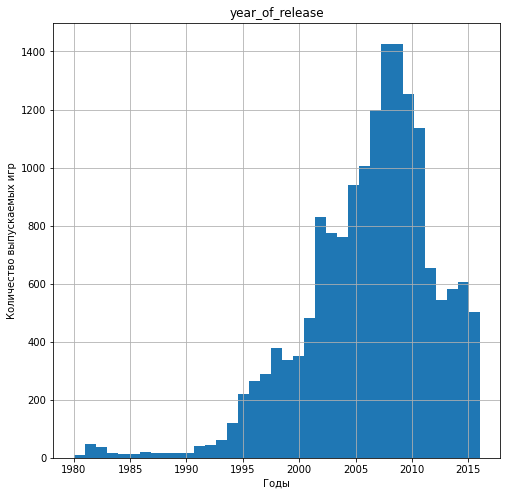

In [10]:
#df.groupby('year_of_release')['name'].count().sort_values()
df.hist(column=['year_of_release','name'],bins=37,grid=True,figsize=(8,8));

plt.xlabel("–ì–æ–¥—ã");
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–ø—É—Å–∫–∞–µ–º—ã—Ö –∏–≥—Ä");

–î–∞–Ω–Ω—ã—Ö –¥–æ 1990 –≥–æ–¥–∞ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –º–æ–∂–µ–º –∏–º–∏ –ø—Ä–∏–Ω–µ–±—Ä–µ—á—å. –ü–∏–∫ –≤—ã—É—Å–∫–∞ –∏–≥—Ä –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –ø–µ—Ä–∏–æ–¥ 2007-2010, –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–æ —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ —Ç–µ–º —á—Ç–æ –Ω–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç –±—ã–ª–æ –º–Ω–æ–≥–æ –∏–≥—Ä–æ–≤—ã—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º –∏ –∫–∞–∂–¥–∞—è –∏–∑ –Ω–∏—Ö –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–ª–∞ –∏–≥—Ä—ã –ø–æ–¥ —Å–µ–±—è. –î—É–º–∞—é –ª–æ–≥–∏—á–Ω–æ –±—É–¥–µ—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ —Ä–∞–∑—Ä–µ–∑–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º, —Ç–∞–∫ –∫–∞–∫ –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –æ–ø—ã—Ç –Ω—ã–Ω–µ—à–Ω–∏—Ö –ª–µ—Ç, –Ω–∞ —Ä—ã–Ω–∫–µ –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –≤—Å–µ–≥–æ –ª–∏—à—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫—Ä—É–ø–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–≤ –ø—Ä–∏—Å—Ç–∞–≤–æ–∫.

In [11]:
df.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –±—ã–ª–∞ –≤–∏–¥–Ω–∞ –¥–∏–Ω–∞–º–∏–∫–∞, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–¥–∞–∂–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö –ø–æ –≥–æ–¥–∞–º.

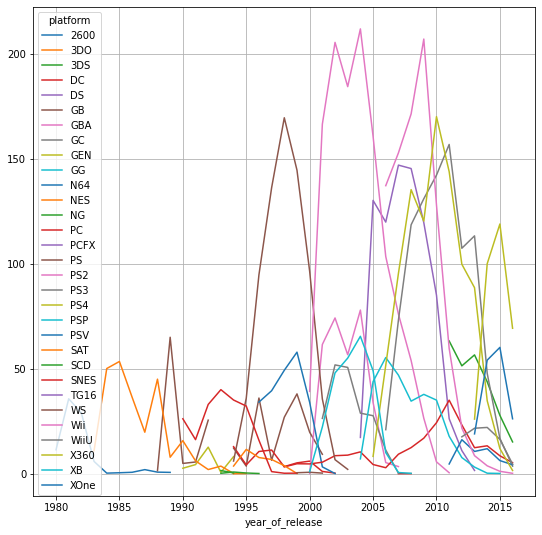

In [12]:
df.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(9, 9))
plt.show()

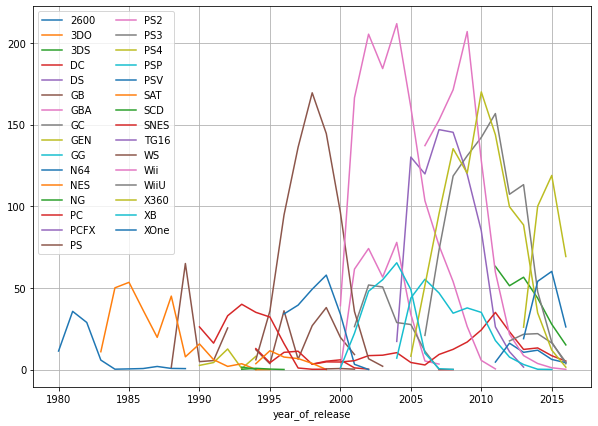

In [13]:

df.pivot_table(index='year_of_release', columns = 'platform', 
               values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 7))
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2)
plt.show()

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –Ω–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ, –ø—Ä–µ–¥–ª–∞–≥–∞—é –≤–∑—è—Ç—å –ø–æ—Å–ª–µ–¥–Ω—é—é –ø—è—Ç–∏–ª–µ—Ç–∫—É.

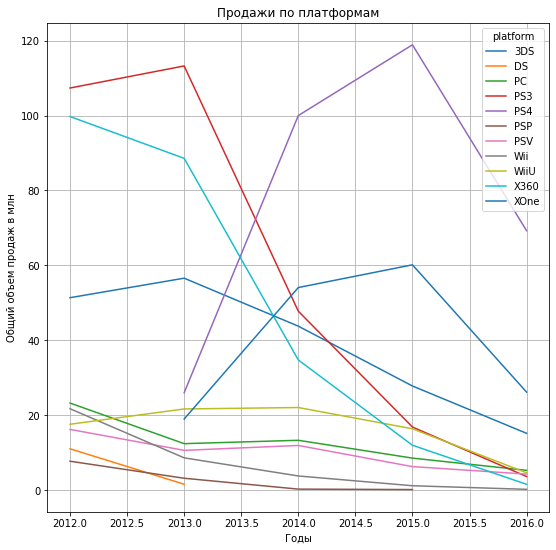

In [14]:
df.query(" year_of_release >= 2012")\
.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(9, 9))
plt.title("–ü—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º")
plt.xlabel("–ì–æ–¥—ã")
plt.ylabel("–û–±—â–∏–π –æ–±—ä–µ–º –ø—Ä–æ–¥–∞–∂ –≤ –º–ª–Ω")
plt.show()

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ–≥–∞–∑—ã–≤–∞—é—Ç —Å—Ç–∞–≥–Ω–∞—Ü–∏—é, –æ–¥–Ω–∞–∫–æ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Ç—Ä–æ–π–∫—É –∏–≥—Ä–æ–∫–æ–≤ –ø–æ —Å—É–º–º–∞–º –ø—Ä–æ–¥–∞–∂, –∫–æ—Ç–æ—Ä—ã–µ –≤ —Ä–∞–∑—ã –æ–±–≥–æ–Ω—è—é—Ç –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤ –ø–æ –∏—Ç–æ–≥–∞–º 2016 –≥–æ–¥–∞: PS4,Xone,3DS.

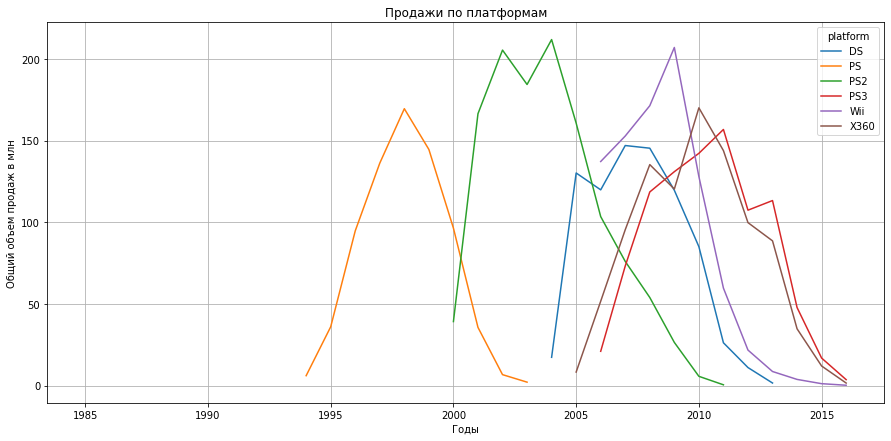

In [15]:
platform_totalsales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(6, 'total_sales').index
df.query('platform in @platform_totalsales').pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum').plot(figsize = (15,7))
plt.title("–ü—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º")
plt.xlabel("–ì–æ–¥—ã")
plt.ylabel("–û–±—â–∏–π –æ–±—ä–µ–º –ø—Ä–æ–¥–∞–∂ –≤ –º–ª–Ω")
plt.grid()
plt.show()

–î–∞–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∂–∏–∑–Ω–µ–Ω–Ω—ã–π —Ü–∏–∫–ª –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ —Å—Ä–µ–¥–Ω–µ–º 10 –ª–µ—Ç.

In [16]:
df_new = df.query("year_of_release >= 2014")

–î–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ 2017 –≥–æ–¥, –≤–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç–∞  –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–≤–∞ –≥–æ–¥–∞ –∏ –≤ –¥–∞–ª—å—à–Ω–µ–π—à–µ–º –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∏–º–∏. –ò–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ —É–∂–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥: —á—Ç–æ –ª–∏–¥–µ—Ä–æ–≤ –ø—Ä–æ–¥–∞–∂ –≤—Å–µ–≥–æ —Ç—Ä–∏ –Ω–∞ —Ç–µ–∫—É—â–∏–π –ø–µ—Ä–∏–æ–¥, –∫ —Ç–æ–º—É –∂–µ –ø—Ä–æ–¥–∞–∂–∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–≤ —Ä—ã–Ω–∫–∞ —Å—Ç—Ä–µ–º—è—Ç—Å—è –∫ –Ω—É–ª—é. –ö–∞—Ä—Ç–∏–Ω–∞ –Ω–µ —Å—Ç–æ–ª—å —Ä–∞–¥—É–∂–Ω–∞, –¥–∞–∂–µ –æ–±—ä–µ–º—ã –ø—Ä–æ–¥–∞–∂ —Ç—Ä–æ–π–∫–∏ –ª–∏–¥–µ—Ä–æ–≤ –ø–∞–¥—É—é—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç. Xone  –∏  PS4 –ø–æ—è–≤–∏–ª–∏—Å—å –Ω–∞ —Ä—ã–Ω–∫–µ –≤ 2013 –≥–æ–¥—É –∏ –¥–æ 2015 –≥–æ–¥–∞ –ø–æ–∫–∞–∑—ã–≤–∞–ª–∏ –ø—Ä–æ—Ä—ã–≤–Ω–æ–π —Ä–æ—Å—Ç –ø—Ä–æ–¥–∞–∂

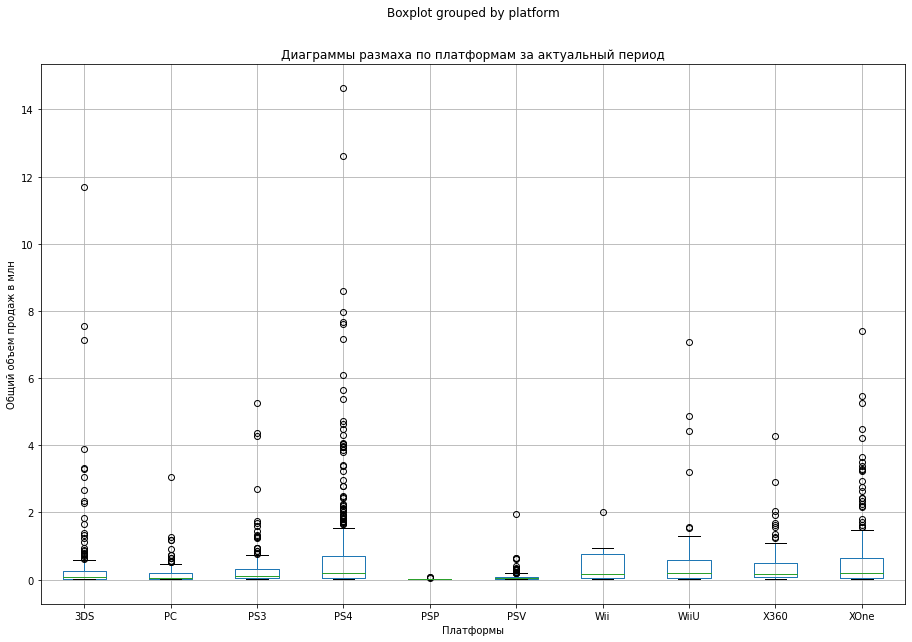

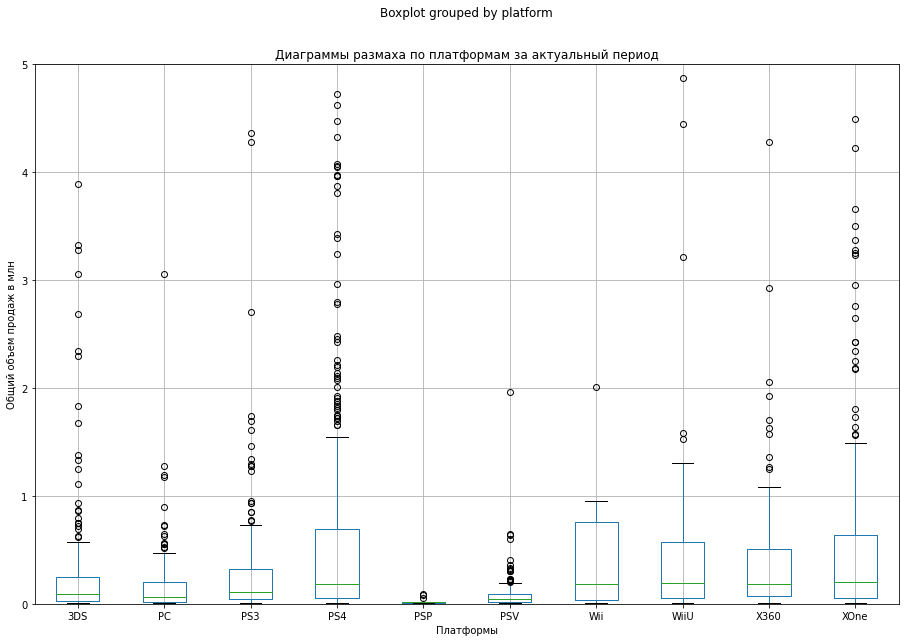

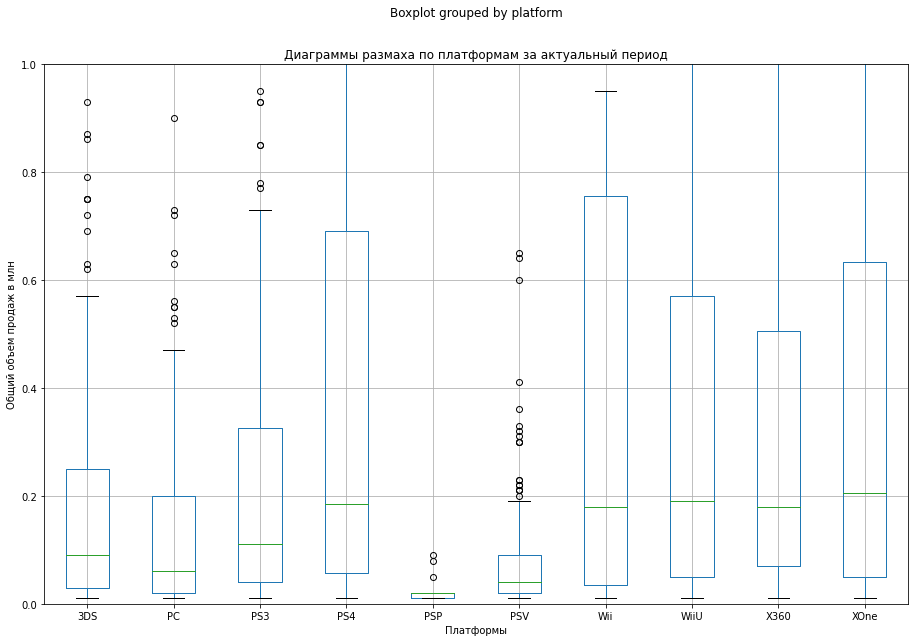

In [17]:
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title("–î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞–∑–º–∞—Ö–∞ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∑–∞ –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥")
plt.xlabel("–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã")
plt.ylabel("–û–±—â–∏–π –æ–±—ä–µ–º –ø—Ä–æ–¥–∞–∂ –≤ –º–ª–Ω")
plt.show()
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.ylim(0, 5)
plt.title("–î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞–∑–º–∞—Ö–∞ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∑–∞ –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥")
plt.xlabel("–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã")
plt.ylabel("–û–±—â–∏–π –æ–±—ä–µ–º –ø—Ä–æ–¥–∞–∂ –≤ –º–ª–Ω")
plt.show()
df_new.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title("–î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞–∑–º–∞—Ö–∞ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∑–∞ –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏–æ–¥")
plt.xlabel("–ü–ª–∞—Ç—Ñ–æ—Ä–º—ã")
plt.ylabel("–û–±—â–∏–π –æ–±—ä–µ–º –ø—Ä–æ–¥–∞–∂ –≤ –º–ª–Ω")
plt.ylim(0, 1)
plt.show()

In [18]:
df_new.groupby('platform')['total_sales'].describe()

count      mean       std   min     25%    50%     75%    max
platform                                                               
3DS       212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
PC        151.0  0.179139  0.329359  0.01  0.0200  0.060  0.2000   3.05
PS3       219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
PS4       376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
PSP        13.0  0.027692  0.027735  0.01  0.0100  0.020  0.0200   0.09
PSV       295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
Wii        11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
WiiU       73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
X360      111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
XOne      228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39

–ù–∞ –¥–∏–∞–≥—Ä–∞–º–º–µ –∑–∞–º–µ—Ç–Ω—ã –≤—ã–±—Ä–æ—Å—ã. –û—Å—Ç–∞–≤–∏–º –∏—Ö,–æ–Ω–∏ —Å–≤—è–∑–∞–Ω—ã —Å —Å–≤–µ—Ä—Ö –ø–æ–ø–ª—É—è—Ä–Ω—ã–º–∏ –∏–≥—Ä–∞–º–∏(—Ç–∞–∫–∏–º–∏ –∫–∞–∫ Call of Duty –Ω–∞ PS4,–Ω–∞–ø—Ä–∏–º–µ—Ä).
–¢–∞–∫ –∂–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —É –≤—Å–µ—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π –±–æ–ª—å—à–µ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ. 
–ù–∞–∏–±–æ–ª–µ–µ –¥–ª–∏–Ω–Ω—ã–π —Ä—è–¥ —É–ø–µ—à–Ω–æ –ø—Ä–æ–¥–∞—é—â–∏—Ö—Å—è –∏–≥—Ä —É PS4, XONE –∏ WIIU.  

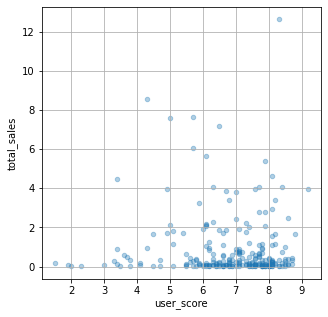

In [19]:
df_user_ps4 = df_new.query('platform=="PS4" and user_score!=-1')
df_critic_ps4 = df_new.query('platform=="PS4" and critic_score!=-1')
df_user_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.35, figsize=(5,5), grid=True);
#–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ç–∑—ã–≤–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

In [20]:

print(len(df_new.query('user_score!=-1')))
print(len(df_new.query('critic_score!=-1')))
print(len(df_new.query('user_score!=-1 and critic_score!=-1')))

888
718
704


In [21]:
df_user_ps4['total_sales'].corr(df_user_ps4['user_score'])

-0.040131589472697356

–ò–∑ –¥–∏–∞–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –æ—Ü–µ–Ω–æ–∫ –æ—Ç 6 –¥–æ 8 —Å –∫–æ–ø–µ–π–∫–∞–º–∏. –ö–æ—ç—Ñ. –ü–∏—Ä—Å–æ–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è- —Å —Ä–æ—Å—Ç–æ–º –æ–¥–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã –¥—Ä—É–≥–∞—è —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è. –û–¥–Ω–∞–∫–æ –∫–æ—ç—Ñ. –æ–∫–æ–ª–æ 0, —Ç.–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç. –¢—Ä—É–¥–Ω–æ –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ –æ—Ü–µ–Ω–∫–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –¥–∞–Ω–Ω–æ–º –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ, –∫ —Ç–æ–º—É –∂–µ –≤—Å–ø–æ–º–Ω–∏–º,—á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç –≤–∑—è–ª–∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–≤–∞ –≥–æ–¥–∞, –≥–¥–µ –±—ã–ª–æ –ø–∞–¥–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ —ç—Ç–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞.

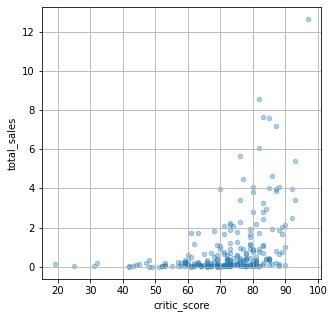

In [22]:
df_critic_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.35, figsize=(5,5), grid=True);
#–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ç–∑—ã–≤–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤

In [23]:
df_critic_ps4['total_sales'].corr(df_critic_ps4['critic_score'])

0.40266141068104083

–ò—Å—Ç–æ—Ä–∏—è –∫–∞–∫ –∏—Å–ø–æ–ª—å–∑–≤–æ–≤–∞—Ç–µ–ª—è–º–∏, –æ–¥–Ω–∞–∫–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞ –∏ –≤—ã—Ä–∞–∂–µ–Ω–∞ —Å–∏–ª—å–Ω–µ–µ.

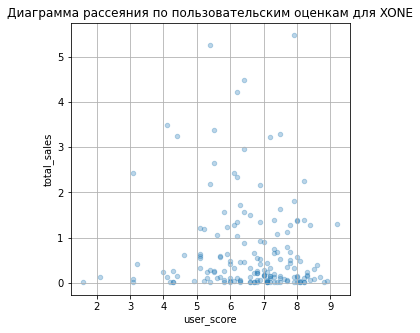

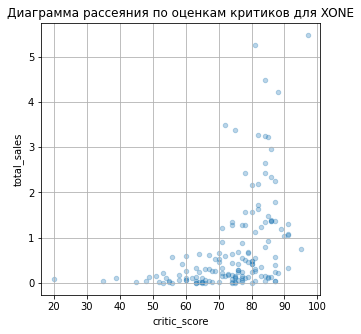

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: -0.0703839280647581
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º: 0.42867694370333226


In [24]:
df_user_xone = df_new.query('platform=="XOne" and user_score!=-1')
df_critic_xone = df_new.query('platform=="XOne" and critic_score!=-1')

df_user_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ü–µ–Ω–∫–∞–º –¥–ª—è XONE')
plt.show()
df_critic_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ü–µ–Ω–∫–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è XONE')
plt.show()
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º:', df_user_xone['user_score'].corr(df_user_xone['total_sales']))
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º:', df_critic_xone['critic_score'].corr(df_critic_xone['total_sales']))

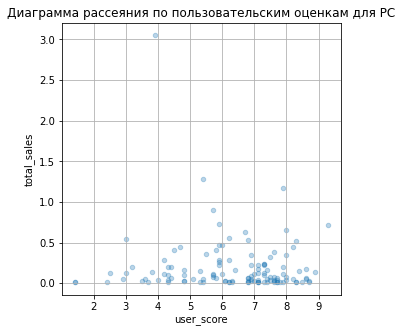

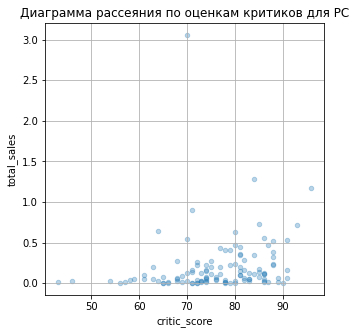

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: -0.07159665703472451
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º: 0.17463413769350036


In [25]:
df_user_pc = df_new.query('platform=="PC" and user_score!=-1')
df_critic_pc = df_new.query('platform=="PC" and critic_score!=-1')

df_user_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ü–µ–Ω–∫–∞–º –¥–ª—è PC')
plt.show()
df_critic_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ü–µ–Ω–∫–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è PC')
plt.show()
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º:', df_user_pc['user_score'].corr(df_user_pc['total_sales']))
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º:', df_critic_pc['critic_score'].corr(df_critic_pc['total_sales']))

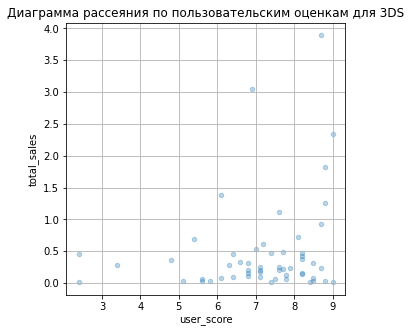

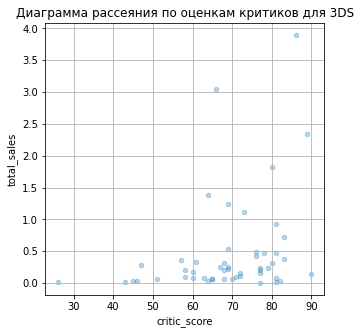

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: 0.2151932718527028
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º: 0.314117492869051


In [26]:
df_user_3ds = df_new.query('platform=="3DS" and user_score!=-1')
df_critic_3ds = df_new.query('platform=="3DS" and critic_score!=-1')

df_user_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ü–µ–Ω–∫–∞–º –¥–ª—è 3DS')
plt.show()
df_critic_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ü–µ–Ω–∫–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è 3DS')
plt.show()
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º:', df_user_3ds['user_score'].corr(df_user_3ds['total_sales']))
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º:', df_critic_3ds['critic_score'].corr(df_critic_3ds['total_sales']))

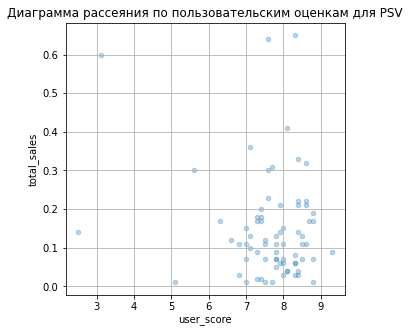

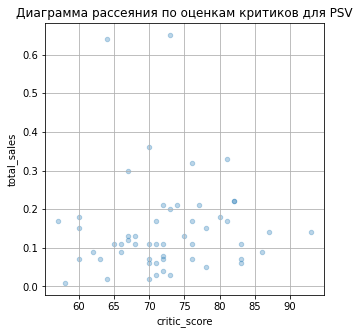

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: -0.16845504978064446
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º: 0.04266490657009526


In [27]:
df_user_psv = df_new.query('platform=="PSV" and user_score!=-1')
df_critic_psv = df_new.query('platform=="PSV" and critic_score!=-1')


df_user_psv.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ü–µ–Ω–∫–∞–º –¥–ª—è PSV')
plt.show()
df_critic_psv.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ü–µ–Ω–∫–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è PSV')
plt.show()
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º:', df_user_psv['user_score'].corr(df_user_psv['total_sales']))
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º:', df_critic_psv['critic_score'].corr(df_critic_psv['total_sales']))

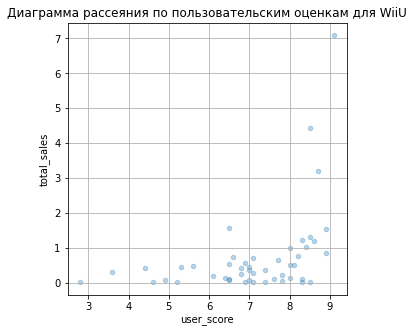

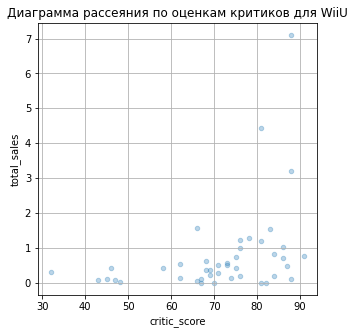

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: 0.40792645792170773
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º: 0.370201412480884


In [28]:
df_user_wiiu = df_new.query('platform=="WiiU" and user_score!=-1')
df_critic_wiiu = df_new.query('platform=="WiiU" and critic_score!=-1')


df_user_wiiu.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ü–µ–Ω–∫–∞–º –¥–ª—è WiiU')
plt.show()
df_critic_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ –æ—Ü–µ–Ω–∫–∞–º –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è WiiU')
plt.show()
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º:', df_user_wiiu['user_score'].corr(df_user_wiiu['total_sales']))
print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –∫—Ä–∏—Ç–∏–∫–∞–º:', df_critic_wiiu['critic_score'].corr(df_critic_wiiu['total_sales']))

–°—Ä–∞–≤–Ω–∏–≤–∞—è, –Ω–∞—à —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –¥—Ä—É–≥–∏–º–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º–∏, –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –æ—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏–º–µ–µ—Ç –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ–∂–µ–ª–∏ –æ—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Ö–æ—Ç—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ç–∞–∫–∂–µ –æ—Å—Ç–∞–µ—Ç—Å—è –º–∞–ª—å–µ–Ω—å–∫–æ–π. –ê –≤ —Å–ª—É—á–∞–µ —Å Wiiu –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å—Ä–∞–≤–Ω—è–ª–∏—Å—å 


3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

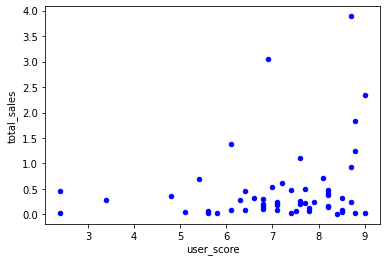

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

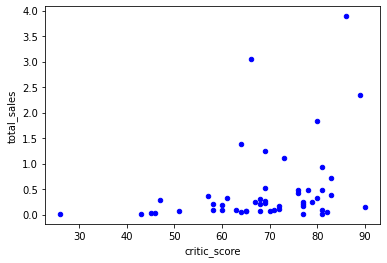

PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

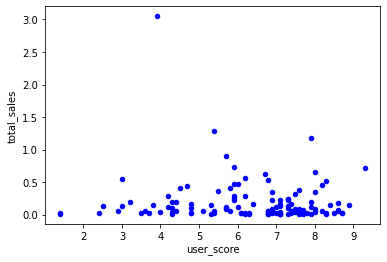

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

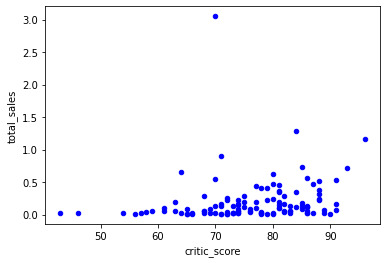

PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

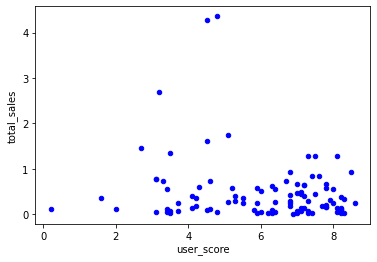

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

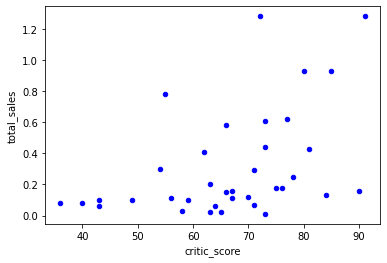

PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

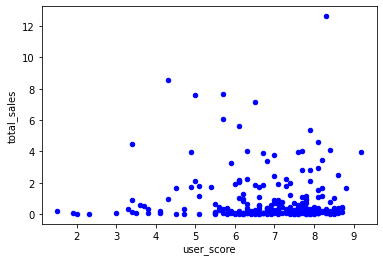

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

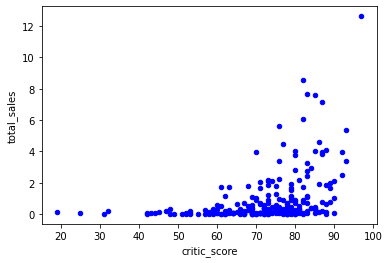

PSP
–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã PSP –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã PSP –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤
PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

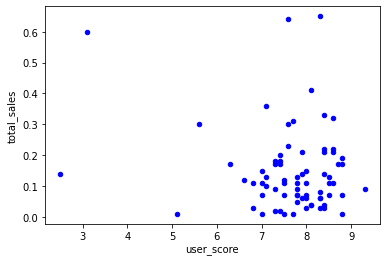

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

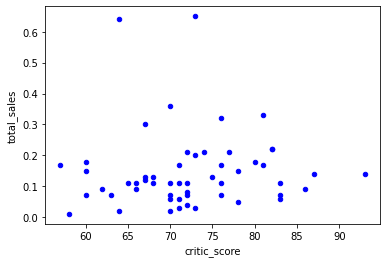

Wii
–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã Wii –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã Wii –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤
WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

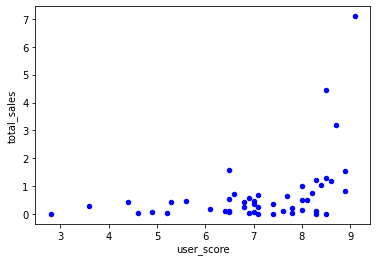

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

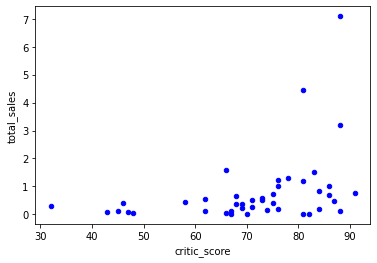

X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

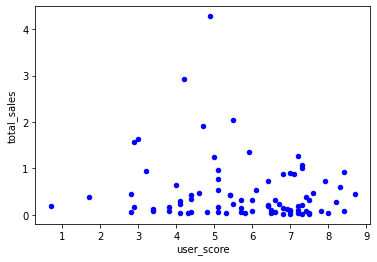

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

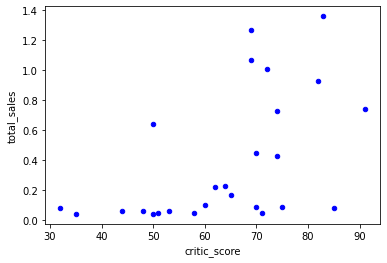

XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

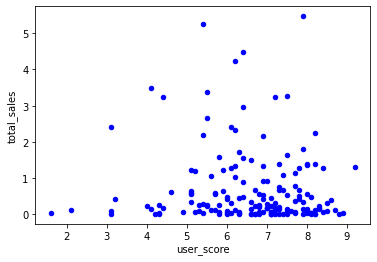

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

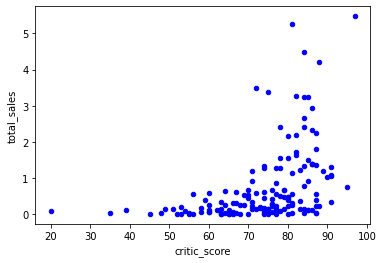

In [43]:
# –¶–∏–∫–ª 
import matplotlib.pyplot as plt
df_sc, y = df_new.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # –°—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∫–æ –≤ –∫–æ–ª–æ–Ω–∫–µ –Ω–µ –ø—É—Å—Ç—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 10 # –ó–∞–¥–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≤—ã–≤–æ–¥–∞ –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.show()
    else:
        print('–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã',platform, '–Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã',platform, '–Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã –∏ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤')


<font color='DarkGreen'>üëå –î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —à–∫–∞–ª–æ–π:</font>
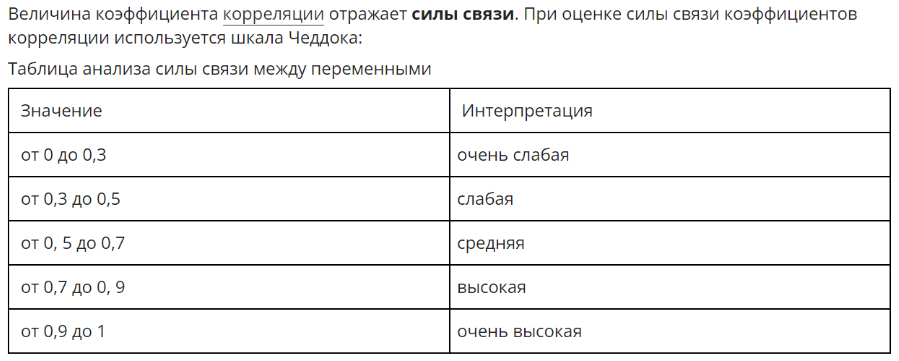

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º:

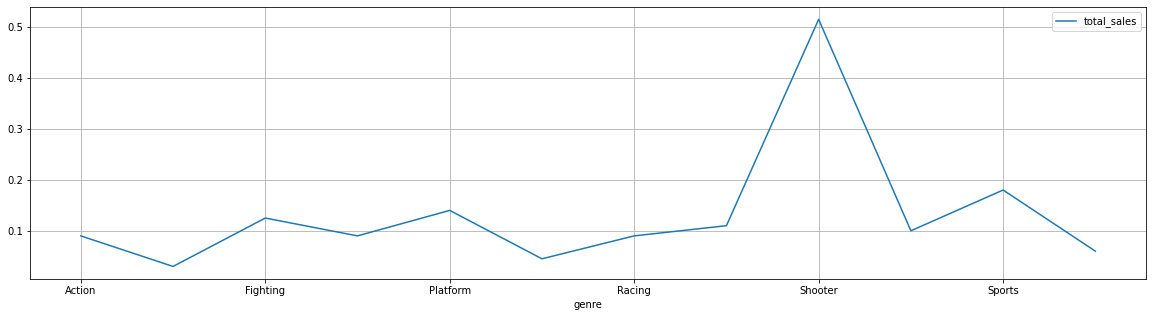

In [29]:
dd=df_new.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(grid=True,figsize=(20,5))

–ñ–∞–Ω—Ä Shooter —è–≤–ª—è–µ—Ç—Å—è —Å–∞–º—ã–º –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã–º, –Ω–∞ –≤—Ç–æ—Ä–æ–º –º–µ—Å—Ç–µ,—Ç—Ä–µ—Ç—å–µ–º –º–µ—Å—Ç–µ —Ä–∞—Å–ø–æ–ª–æ–∂–∏–ª–∏—Å—å Sports –∏ Fighting.

## –ü–æ—Ä—Ç—Ä–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞
–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞ (NA, EU, JP):
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã (—Ç–æ–ø-5). –û–ø–∏—à–∏—Ç–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –¥–æ–ª—è—Ö –ø—Ä–æ–¥–∞–∂.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã (—Ç–æ–ø-5). –ü–æ—è—Å–Ω–∏—Ç–µ —Ä–∞–∑–Ω–∏—Ü—É.
* –í–ª–∏—è–µ—Ç –ª–∏ —Ä–µ–π—Ç–∏–Ω–≥ ESRB –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º —Ä–µ–≥–∏–æ–Ω–µ?

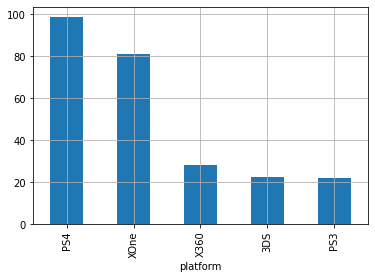

In [31]:
df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'na_sales', kind = 'bar', grid=True);

–°–∞–º–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–æ–π –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ –æ–∫–∞–∑–∞–ª–∞—Å—å PS4.

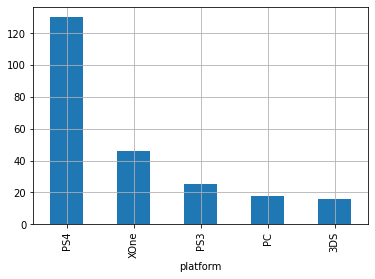

In [32]:
df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'eu_sales', kind = 'bar', grid=True);

–í –µ–≤—Ä–æ–ø–µ —Ç–∞ –∂–µ –∏—Å—Ç–æ—Ä–∏—è

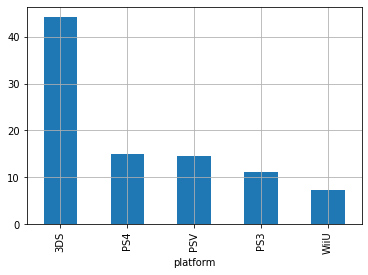

In [33]:
df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'platform', y = 'jp_sales', kind = 'bar', grid=True);

–ê –≤–æ—Ç –ª–∏–¥–µ—Ä–æ–º –Ω–∞ —Ä—ã–Ω–∫–µ –Ø–ø–æ–Ω–∏–∏ –æ–∫–∞–∑–∞–ª–∞—Å—å 3DS. –ß—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞–∑–ª–∏—á–∏—è –≤ –¥–æ–ª—è—Ö –ø—Ä–æ–¥–∞–∂ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤–∑–≥–ª—è–Ω—É—Ç—å –Ω–∞ –æ—Å—å Y. –í –Ø–ø–æ–Ω–∏–∏ –¥–æ–ª—è —Ä—ã–Ω–∫–∞ –∑–∞–º–µ—Ç–Ω–æ –º–µ–Ω—å—à–µ, —ç—Ç–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–æ —Ç–µ–º, —á—Ç–æ –Ω–∞—Å–µ–ª–µ–Ω–∏–µ –Ø–ø–æ–Ω–∏–∏ –≤ —Ä–∞–∑—ã –º–µ–Ω—å—à–µ –Ω–∞—Å–µ–ª–µ–Ω–∏—è —Ç–æ–π –∂–µ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–∏.


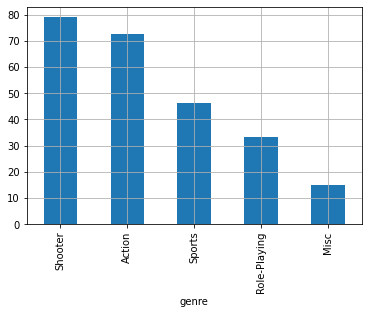

In [34]:
df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'na_sales', kind = 'bar', grid=True);

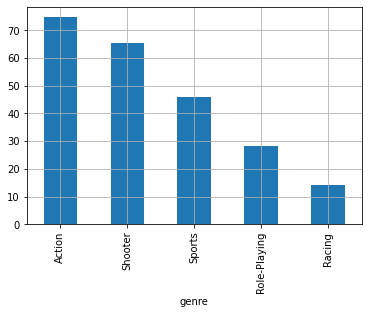

In [35]:
df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'eu_sales', kind = 'bar', grid=True);

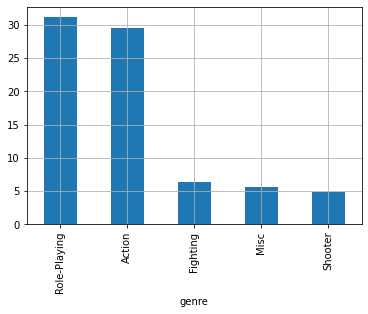

In [36]:
df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'genre', y = 'jp_sales', kind = 'bar', grid=True);


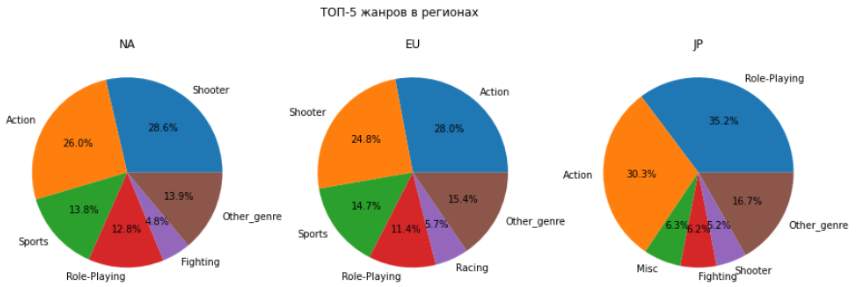

–í–æ –≤—Å–µ—Ö —Ç—Ä–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö —Ç–æ–ø-5 –∂–∞–Ω—Ä–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤—ã. –í –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ –≤ –ø–µ—Ä–≤–æ–π –ø—è—Ç–µ—Ä–∫–µ, –∫–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –æ—Å–∏ –£, –Ω–µ–º–Ω–æ–≥–∏–º –±–æ–ª—å—à–µ —á–µ–º –≤ –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö. –ê –≤ –Ø–ø–æ–Ω–∏–∏ –∂–∞–Ω—Ä Misc –æ–±–æ–≥–Ω–∞–ª Racing –∏ –≤–æ—à–µ–ª –≤ —Ç–æ–ø-5

–í–ª–∏—è–µ—Ç –ª–∏ —Ä–µ–π—Ç–∏–Ω–≥ ESRB –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º —Ä–µ–≥–∏–æ–Ω–µ?

–≤ –Ø–ø–æ–Ω–∏–∏ –∫–∞—Ä—Ç–∏–Ω–∞ –ø–æ –∂–∞–Ω—Ä–∞–º —Å–æ–≤—Å–µ–º, –¥—Ä—É–≥–∞—è, —Ç—É—Ç –ª–∏–¥–∏—Ä—É–µ—Ç Role-Playing


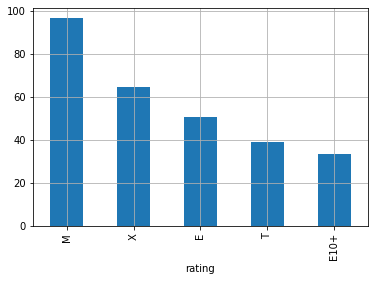

In [37]:
df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'na_sales', kind = 'bar', grid=True);

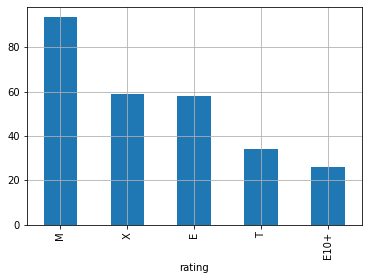

In [38]:
df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'eu_sales', kind = 'bar', grid=True);

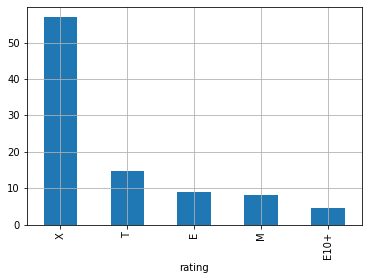

In [39]:
df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(x = 'rating', y = 'jp_sales', kind = 'bar', grid=True);

–í –°–µ–≤–µ—Ä–Ω–æ–π –∞–º–µ—Ä–∏–∫–µ —Å–∞–º—ã–µ –Ω–∏–∑–∫–∏–µ –ø—Ä–æ–¥–∞–∂–∏ —É –∏–≥—Ä –≤ –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø–µ 10+, —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ï- "–î–ª—è –≤—Å–µ—Ö". –•—Ä–æ–Ω–æ–ª–æ–≥–∏—è –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –∏ –≤ –¥–≤—É—Ö –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö.

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ;
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–∑–Ω—ã–µ.

–î–ª—è –ø—Ä–æ–≤–µ–∫–∏ –ø–µ—Ä–≤–æ–π —Ç–µ–æ—Ä–∏–∏ —Å—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –≥–∏–ø–æ—Ç–µ–∑—ã —Ç–∞–∫:
* H0- —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º —Ä–∞–≤–Ω—ã;
* H1- —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º –Ω–µ —Ä–∞–≤–Ω—ã.


In [40]:
df_x = df_new.query('platform == "XOne" and user_score!=-1')
df_pc = df_new.query('platform == "PC" and user_score!=-1')
alpha = .05 

results = st.ttest_ind(
df_x['user_score'],
df_pc['user_score'])
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)
if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.10450507919348415
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–î–ª—è –≤—Ç–æ—Ä–æ–π:
* H0- —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ —Ä–∞–≤–Ω—ã;
* H1- —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ –Ω–µ —Ä–∞–≤–Ω—ã.

In [41]:
df_a = df_new.query('genre == "Action" and user_score!=-1')
df_s = df_new.query('genre == "Sports" and user_score!=-1')
alpha = .05 

results = st.ttest_ind(
df_a['user_score'],
df_s['user_score'])
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ: ', results.pvalue)
if results.pvalue < alpha:
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É") 

p-–∑–Ω–∞—á–µ–Ω–∏–µ:  2.8711147985105864e-19
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–ü–æ—Å–ª–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ –ø–æ–ª—É—á–∞–µ–º:
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC  –æ–¥–∏–Ω–∞–∫–æ–≤—ã;
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª)  –Ω–µ —Ä–∞–≤–Ω—ã.

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ —è –ø—Ä–∏–º–µ–Ω—è–ª t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞(–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π)  —Ç.–∫. :
* –¥–≤–µ –≤—ã–±–æ—Ä–∫–∏ —è–≤–ª—è—é—Ç—Å—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏; 
* –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –¥–≤—É—Ö –≥–µ–Ω–µ—Ä–∞–ª—å–Ω—ã—Ö —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–µ–π —Ä–∞–≤–Ω—ã.

In [42]:
print('–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Xbox One:',df_x['user_score'].mean())
print('–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ PC:',df_pc['user_score'].mean())
print('–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Action:',df_a['user_score'].mean())
print('–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Sports:',df_s['user_score'].mean())


–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Xbox One: 6.594545454545456
–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ PC: 6.298360655737705
–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Action: 6.760606060606061
–°—Ä. –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ Sports: 5.2251968503937


## –û–±—â–∏–π –≤—ã–≤–æ–¥

–î–∞–Ω–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–æ 90—Ö –≥–æ–¥–æ–≤ –º–æ–∂–Ω–æ –Ω–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å,—Ç–∞–∫ –∫–∞–∫ –∏—Ö –¥–æ–≤–æ–ª—å–Ω–æ –º–∞–ª–æ. –í—Å–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–ø–∞–¥ –Ω–∞ —Ç–µ–∫—É—â–∏–π –≥–æ–¥(2016), –ø—Ä–∏—á–µ–º –≤—Å–µ ,–∫—Ä–æ–º–µ –ª–∏–¥–∏—Ä—É—é—â–µ–π —Ç—Ä–æ–π–∫–∏, —Å—Ç—Ä–µ–º—è—Ç—Å—è –∫ –Ω—É–ª—é. –î–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –º—ã –≤–∑—è–ª–∏ –¥–∞–Ω–Ω—ã–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–≤–∞ –≥–æ–¥–∞. –Ø—â–∏–∫–∏ —Å —É—Å–∞–º–∏ –¥–∞–ª–∏ –Ω–∞–º –ø–æ–Ω—è—Ç—å,—á—Ç–æ PS4- –ª–∏–¥–µ—Ä –∞–Ω–æ–º–∞–ª—å–Ω–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∏–≥—Ä.
–¢–∞–∫–∂–µ —É–≤–∏–¥–µ–ª–∏,—á—Ç–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –æ—Ç–∑—ã–≤–∞–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π- –Ω–µ—Ç, —Å—Ä–µ–¥–∏ –æ—Ü–µ–Ω–æ–∫ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è —Å–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, –Ω–æ –Ω–µ –ø–æ –≤—Å–µ–º –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º.
–ñ–∞–Ω—Ä Shooter —è–≤–ª—è–µ—Ç—Å—è —Å–∞–º—ã–º –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã–º, –Ω–∞ –≤—Ç–æ—Ä–æ–º –º–µ—Å—Ç–µ –∏ —Ç—Ä–µ—Ç—å–∏—Ö –º–µ—Å—Ç–∞—Ö —Ä–∞—Å–ø–æ–ª–æ–∂–∏–ª–∏—Å—å Sports –∏ Fighting.
–õ—é–±–∏–º–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ê–º–µ—Ä–∏–∫–∏ –∏ –ï–≤—Ä–æ–ø—ã- PS4, —É –Ø–ø–æ–Ω—Ü–µ–≤-3DS.–í –∂–∞–Ω—Ä–∞—Ö –∂–µ –≤–∫—É—Å—ã –≤—Å–µ—Ö —Ç—Ä–µ—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ —Å—Ö–æ–∂–∏.
–ù—É –∏ –ø–æ–¥–≤–æ–¥—è –∏—Ç–æ–≥, –±–ª–∞–≥–æ–¥–∞—Ä—è –ø—Ä–æ–≤–µ—Ä–∫–µ –Ω–∞—à–∏—Ö –≥–∏–ø–æ—Ç–µ–∑, –º—ã –º–æ–∂–µ–º —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ:
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC  –æ–¥–∏–Ω–∞–∫–æ–≤—ã;
* –°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–≤–Ω—ã.


–°—Ç—Ä–∞—Ç–µ–≥–∏—è –Ω–∞ 2017 –≥–æ–¥:
–î–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –ø—Ä–æ–¥–∞–∂ –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –∞–∫—Ü–µ–Ω—Ç—ã:
1. –ü–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –≥–æ–¥ ‚Äì ps4,xone,3ds
2. –¢–æ–ø–æ–≤—ã–µ –∂–∞–Ω—Ä—ã ‚ÄìShooter,Sports,Fighting, –Ω–æ –∏ –Ω–µ —Å—Ç–æ–∏—Ç –∑–∞–±—ã–≤–∞—Ç—å,–≤ –ø—Ä–æ—à–ª–æ–º –Ω–∞ –¥—Ä—É–≥–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö –±—ã–ª —Å–≤–µ—Ä—Ö –ø–æ–ø—É–ª—è—Ä–µ–Ω Action
3. –ë–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Ä–µ–π—Ç–∏–Ω–≥ E –∏ X
4. –¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ –∞–Ω–æ–º–∞–ª—å–Ω–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∏–≥—Ä –ø—Ä–æ—à–ª—ã—Ö –ª–µ—Ç –∏ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞—Ç—å –∏—Ö –Ω–æ–≤—ã–µ —Ä–µ–ª–∏–∑—ã. –ù–∞–ø—Ä–∏–º–µ—Ä –¥–ª—è PS4 —ç—Ç–æ Call of Duty 

–í –ï–≤—Ä–æ–ø–µ –∏ –ê–º–µ—Ä–∏–∫–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å –∞–∫—Ü–µ–Ω—Ç –Ω–∞ PS4, –≤ –Ø–ø–æ–Ω–∏–∏ –Ω–∞ 3DS.–ñ–∞–Ω—Ä –≤—ã–±–∏—Ä–∞–µ–º Shooter, –∞ —Ä–µ–π—Ç–∏–Ω–≥ E. –†–µ–∫–ª–∞–º–∏–∏—Ä–æ–≤–∞—Ç—å –ª—É—á—à–µ –Ω–∞—á–∞—Ç—å —Å –ê–º–µ—Ä–∏–∫–∏ —Ç–∞–º, –±–æ–ª—à–µ —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ–¥–∞–∂ –ø–æ –∏–≥—Ä–∞–º. –ù–∞ –æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ–±—Ä–∞—à–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏—è –Ω–µ —Å—Ç–æ–∏—Ç,–∞ –≤–æ—Ç –∫ –∫—Ä–∏—Ç–∏–∫–∞–º –º–æ–∂–Ω–æ –ø—Ä–∏—Å–ª—É—à–∞—Ç—å—Å—è. –ñ–∞–Ω—Ä –¥–ª—è —è–ø–æ–Ω—Ü–µ–≤ –≤—ã–±–∏—Ä–∞–µ–º Role-Playing, –∞ —Ä–µ–π—Ç–∏–Ω–≥ X. –ê–∫—Ü–µ–Ω—Ç –ª—É—á—à–µ —Å–¥–µ–ª–∞—Ç—å –Ω–∞ –ê–º–µ—Ä–∏–∫—É –∏ –ï–≤—Ä–æ–ø—É- –≤–∫—É—Å—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Ç–∞–º –∏–¥–µ–Ω—Ç–∏—á–Ω—ã –∏ –æ—Ö–≤–∞—Ç –≤ —Ä–∞–∑—ã –±–æ–ª—å—à–µ —á–µ–º –≤ –Ø–ø–æ–Ω–∏–∏.
    